In [1]:
import pandas as pd
df = pd.read_csv('Real_Combine_1.csv')
X = df.iloc[:,:-1]
y = df.iloc[:,1]

In [2]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [3]:
from sklearn.neighbors import KNeighborsRegressor

In [4]:
regressor = KNeighborsRegressor(n_neighbors = 1)
regressor.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [5]:
regressor.score(X_train,y_train)

1.0

In [6]:
regressor.score(X_test,y_test)

0.9504559815449741

In [7]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(regressor,X,y,cv=5)
score.mean()

0.9314668080433709

In [8]:
prediction = regressor.predict(X_test)

<AxesSubplot:xlabel='TM'>

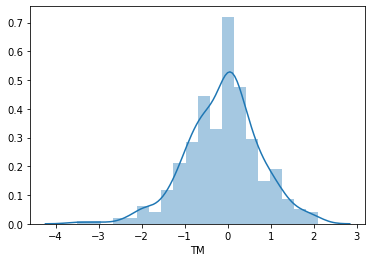

In [9]:
import seaborn as sns
sns.distplot(y_test - prediction)

#### now lets see score after hyper parameter tuning

In [10]:
accuracy_rate = []

for i in range(1,40):
    knn = KNeighborsRegressor(n_neighbors = i)
    scores = cross_val_score(knn,X,y,cv=10,scoring = 'neg_mean_squared_error')
    accuracy_rate.append(scores.mean())

In [11]:
accuracy_rate

[-0.8029444532237676,
 -0.6266645464601771,
 -1.3098736479842674,
 -2.3887275600505693,
 -3.2305068046776233,
 -3.768543275477595,
 -4.298183970174669,
 -4.729106115676359,
 -5.099422552714957,
 -5.316965318426042,
 -5.636292935895561,
 -5.907935378696096,
 -6.181638354285265,
 -6.440436747352227,
 -6.613736057732828,
 -6.826690131224815,
 -6.989194309686394,
 -7.091128243228215,
 -7.2913991743156235,
 -7.4356881151232646,
 -7.56610309558927,
 -7.670861759946613,
 -7.817798750684093,
 -7.915897019639347,
 -8.019354625031607,
 -8.119601520596914,
 -8.19565297265707,
 -8.264809549374823,
 -8.33318692247505,
 -8.41986574316969,
 -8.471358089955155,
 -8.541452370123977,
 -8.587384271400358,
 -8.680418883407734,
 -8.76817075414742,
 -8.823376136739412,
 -8.878081671578723,
 -8.917573795650773,
 -8.95057009645203]

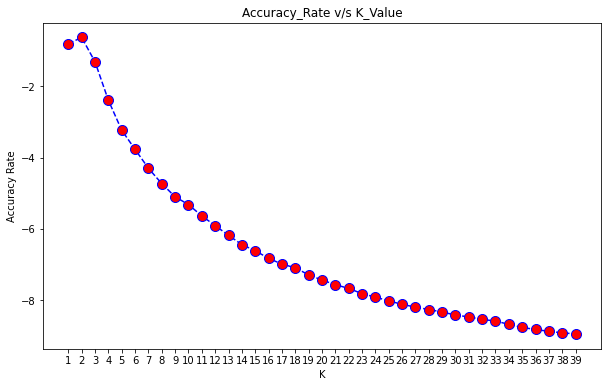

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor = 'red',markersize=10)
plt.title('Accuracy_Rate v/s K_Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')
plt.xticks(range(1,40))# to display all coordinates
plt.show()

#### from here we get to know that K=2 has the least error, hence we will use that

In [24]:
kn = KNeighborsRegressor(n_neighbors = 2)
kn.fit(X_train,y_train)
prediction = kn.predict(X_test)

<AxesSubplot:xlabel='TM'>

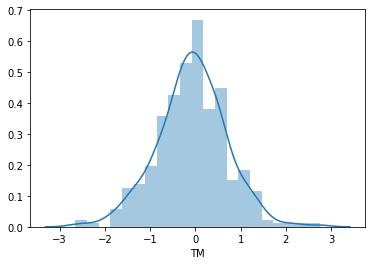

In [26]:
sns.distplot(y_test - prediction)

In [27]:
from sklearn import metrics
import numpy as np
print(metrics.mean_absolute_error(y_test,prediction))
print(metrics.mean_squared_error(y_test,prediction))
print(np.sqrt(metrics.mean_squared_error(y_test,prediction)))

0.590059347181009
0.5954376854599409
0.7716460882165741
